<a href="https://colab.research.google.com/github/LuciaMartin22/infovis/blob/main/Tp_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Tiene formato de código

```
# Tiene formato de código
```


```



El presente análisis se centra en el dataset de desempeño estudiantil correspondiente a la materia de Matemática, extraído del repositorio UCI Machine Learning Repository. Este conjunto de datos busca predecir el rendimiento de los estudiantes en la educación secundaria.Los datos incluyen calificaciones estudiantiles, características demográficas, sociales y escolares, sobre el rendimiento en dos asignaturas distintas: Matemáticas y Lengua. En este trabajo nos focalizaremos en los resultados de matemática.



In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Nelson970/infovis/refs/heads/main/student-mat.csv"
df = pd.read_csv(url, sep=";")
print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [56]:
#importamos las librerias necesarias para este trabajo
import pandas as pd
import duckdb
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
(rows, cols) = df.shape
print("El archivo tiene " + str(rows) + " filas y " + str(cols) + " columnas.")

El archivo tiene 395 filas y 33 columnas.


In [5]:
# Eliminar duplicados
df = df.drop_duplicates()
# Eliminar filas con valores nulos
df = df.dropna()

EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [12]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [75]:
cantidad_ceros = (df['G3'] == 0).sum()
print("Cantidad de alumnos con nota final G3 = 0  es", cantidad_ceros)


Cantidad de alumnos con nota final G3 = 0  es 38


In [76]:
df[df['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_name
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,1,2,4,0,7,4,0,Gabriel Pereira
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,2,2,2,2,5,0,12,0,0,Gabriel Pereira
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,3,3,1,2,4,0,8,0,0,Gabriel Pereira
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,3,3,1,1,5,0,9,0,0,Gabriel Pereira
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,3,3,1,1,5,0,11,0,0,Gabriel Pereira
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,4,5,2,4,5,0,10,0,0,Gabriel Pereira
137,GP,F,16,U,GT3,A,3,3,other,other,...,3,2,1,1,5,0,4,0,0,Gabriel Pereira
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,1,1,3,0,7,9,0,Gabriel Pereira
144,GP,M,17,U,GT3,T,2,1,other,other,...,4,5,1,2,5,0,5,0,0,Gabriel Pereira
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,2,1,1,3,0,6,7,0,Gabriel Pereira


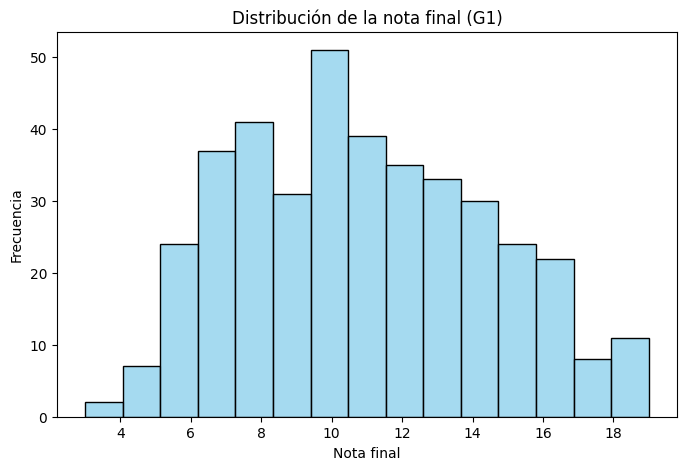

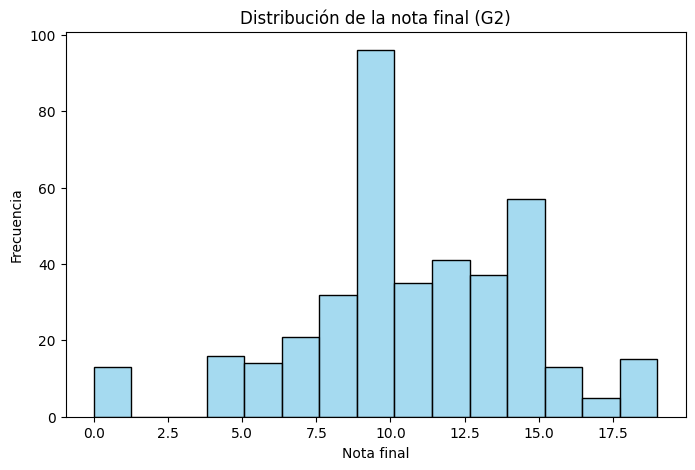

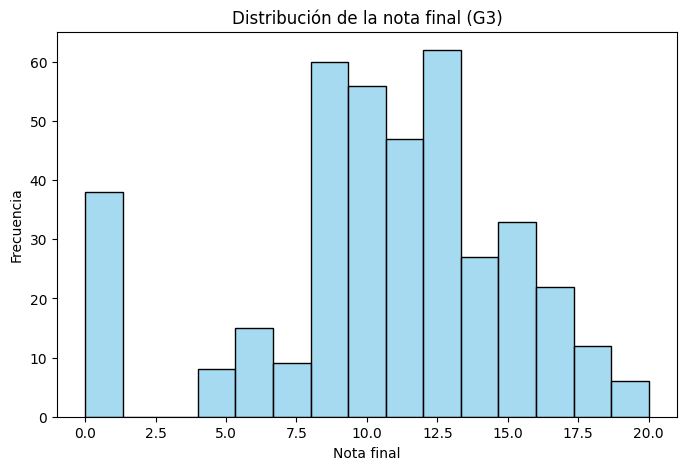

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['G1'], bins=15, color="skyblue")
plt.title("Distribución de la nota final (G1)")
plt.xlabel("Nota final")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['G2'], bins=15, color="skyblue")
plt.title("Distribución de la nota final (G2)")
plt.xlabel("Nota final")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=15, color="skyblue")
plt.title("Distribución de la nota final (G3)")
plt.xlabel("Nota final")
plt.ylabel("Frecuencia")
plt.show()

Vemos que en el gráfico de G3 hay una gran cantidad de ceros y que las notas se concentran entre 8 y 13. En G" hay una clara distincion en donde la nota promedio es un 9 y en G1 esta más repartido. Dentro de los valores atipicos encontramos una alta cnatidad de notas "cero" que llama la atención

/tmp/ipython-input-924875881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='G3', data=df, palette="Set2")


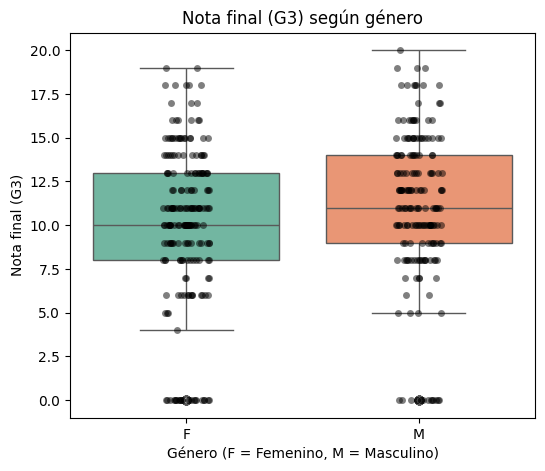

In [24]:
plt.figure(figsize=(6,5))
sns.boxplot(x='sex', y='G3', data=df, palette="Set2")
sns.stripplot(x='sex', y='G3', data=df, color="black", alpha=0.5, jitter=True)
plt.title("Nota final (G3) según género")
plt.xlabel("Género (F = Femenino, M = Masculino)")
plt.ylabel("Nota final (G3)")
plt.show()

In [71]:
map_colegio = {"GP": "Gabriel Pereira", "MS": "Mousinho da Silveira"}
df["school_name"] = df["school"].map(map_colegio).fillna(df["school"])
opciones = sorted(df["school_name"].unique().tolist())
selector = alt.selection_point(
    fields=["school_name"],
    bind=alt.binding_select(options=opciones, name="Colegio: "),
    value=opciones[0]
)
chart = (
    alt.Chart(df)
    .add_params(selector)
    .transform_filter(selector)
    .transform_aggregate(
        total_alumnos="count()",
        groupby=["age"]
    )
    .mark_bar()
    .encode(
        x=alt.X("age:O", title="Edad"),
        y=alt.Y("total_alumnos:Q", title="Total de alumnos"),
        tooltip=[alt.Tooltip("age:O", title="Edad"),
                 alt.Tooltip("total_alumnos:Q", title="Total")]
    )
    .properties(
        width=600,
        height=350,
        title="Total de alumnos por edad (filtrado por colegio)"
    )
)
chart # Display the chart

alt.Chart(...)

Este gráfico es útil para entender la composición, etaria de cada colegio y detectar edades predominantes. Se ve que el colegio "Gabriel Pereira" tiene mas alumnos de entre 15 y 17 años mientras que el "Mousinho da Silveira tiene alumnos mas grandes, mayoritariamente de 18 años.

Preguntas de investigación

¿Hay diferencias en las notas finales (G3) entre estudiantes hombres y mujeres?

¿Influye el consumo de alcohol en la nota final? ¿Cambia si es durante la semana o solo los fin de semana?


¿El nivel educativo de los padres (Medu, Fedu) está asociado al rendimiento académico (G3)?

/tmp/ipython-input-1212658157.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medu', y='G3', data=df, order=df.groupby('Medu')['G3'].mean().sort_values().index, palette="Set2")


<Axes: xlabel='Medu', ylabel='G3'>

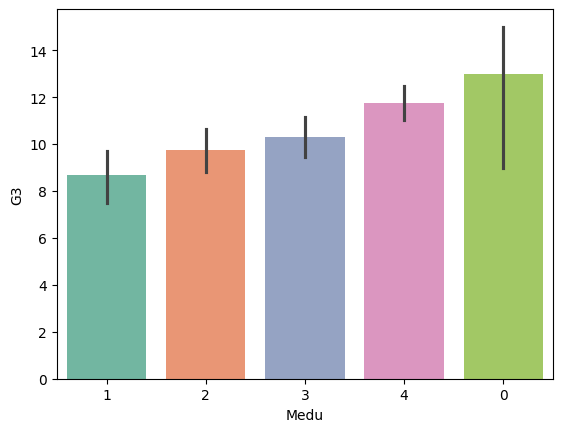

In [67]:
sns.barplot(x='Medu', y='G3', data=df, order=df.groupby('Medu')['G3'].mean().sort_values().index, palette="Set2")

/tmp/ipython-input-1478798666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Medu", y="G3", data=df, palette="pastel")


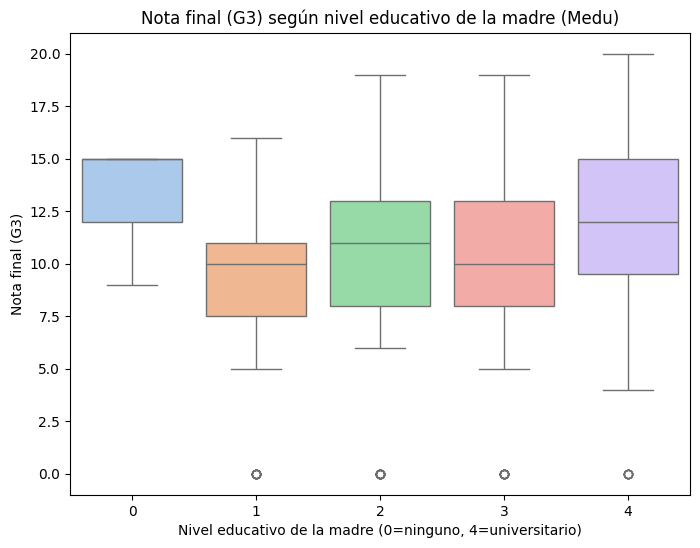

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Medu", y="G3", data=df, palette="pastel")
plt.title("Nota final (G3) según nivel educativo de la madre (Medu)")
plt.xlabel("Nivel educativo de la madre (0=ninguno, 4=universitario)")
plt.ylabel("Nota final (G3)")
plt.show()

El boxplot muestra la distribución de la nota final (G3) de los estudiantes según el nivel educativo de la madre (Medu). Se observa que la mediana de las notas tiende a ser mayor a medida que aumenta el nivel educativo de la madre, lo que sugiere una posible relación positiva entre la educación materna y el rendimiento académico de los hijos. Además, el gráfico permite identificar la dispersión de las notas dentro de cada categoría y detectar valores atípicos.

/tmp/ipython-input-1105962567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Fedu", y="G3", data=df, palette="pastel")


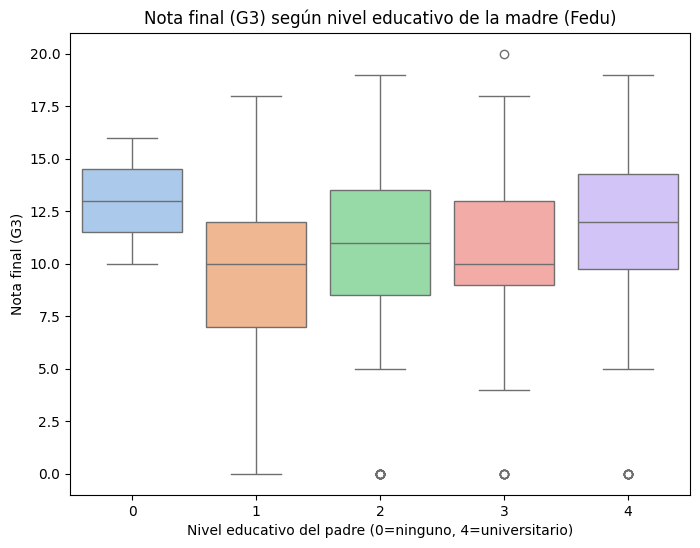

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Fedu", y="G3", data=df, palette="pastel")
plt.title("Nota final (G3) según nivel educativo de la madre (Fedu)")
plt.xlabel("Nivel educativo del padre (0=ninguno, 4=universitario)")
plt.ylabel("Nota final (G3)")
plt.show()

In [83]:
alt.Chart(df).mark_point().encode(
    #x='absences:Q',
    #y='G3:Q',
    x=alt.X('absences:Q', scale=alt.Scale(zero=False)),
    y=alt.X('G3:Q', scale=alt.Scale(zero=False)),
    color=alt.Color("sex", scale=alt.Scale(domain=['M', 'F'], range=['red', '#1fc3aa'])),
    tooltip=["sex", "G1", "G3"]
).properties(
    title='relación nota G1 y G3'
)

alt.Chart(...)